In [2]:
import sys
sys.path.append('C:/Users/320060820/experiments/')
import fxp_quantize
import model_data
import fixed_bitwidth
from model_gen import keras_cnn, inception_cnn

import keras
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pltP

# to restart layer numbering
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


## Weights

In [3]:
# config
save_path = 'C:/Users/320060820/experiments/test_models/'

In [3]:
name = 'cifar_keras'
model_path = 'cifar_keras/cifar_keras_new.h5'

from test_models.cifar_keras import data
_, test_data = data.get_data()

keras_model = model_data.Model(name, test_data, path=save_path + model_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
name = 'mnist_keras'
model_path = 'mnist_custom/mnist_keras.h5'

from test_models.mnist_custom import data
_, test_data = data.get_data()

keras_model = model_data.Model(name, test_data, path=save_path+model_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [9]:
name = 'cifar_df'
model_path = 'cifar_df2/model_32_0.75.h5'

from test_models.cifar_df2 import data
_, test_data = data.get_data()

keras_model = model_data.Model(name, test_data, path=save_path + model_path)

In [4]:
keras_model.load_model_from_path()

In [5]:
offsets = fixed_bitwidth.find_offsets_for_model_weights(keras_model, 0, 4)
w_quant_params = {i: [4, j] for i, j in offsets.items()}
keras_model = fxp_quantize.fix_weights_quantization(keras_model, w_quant_params)

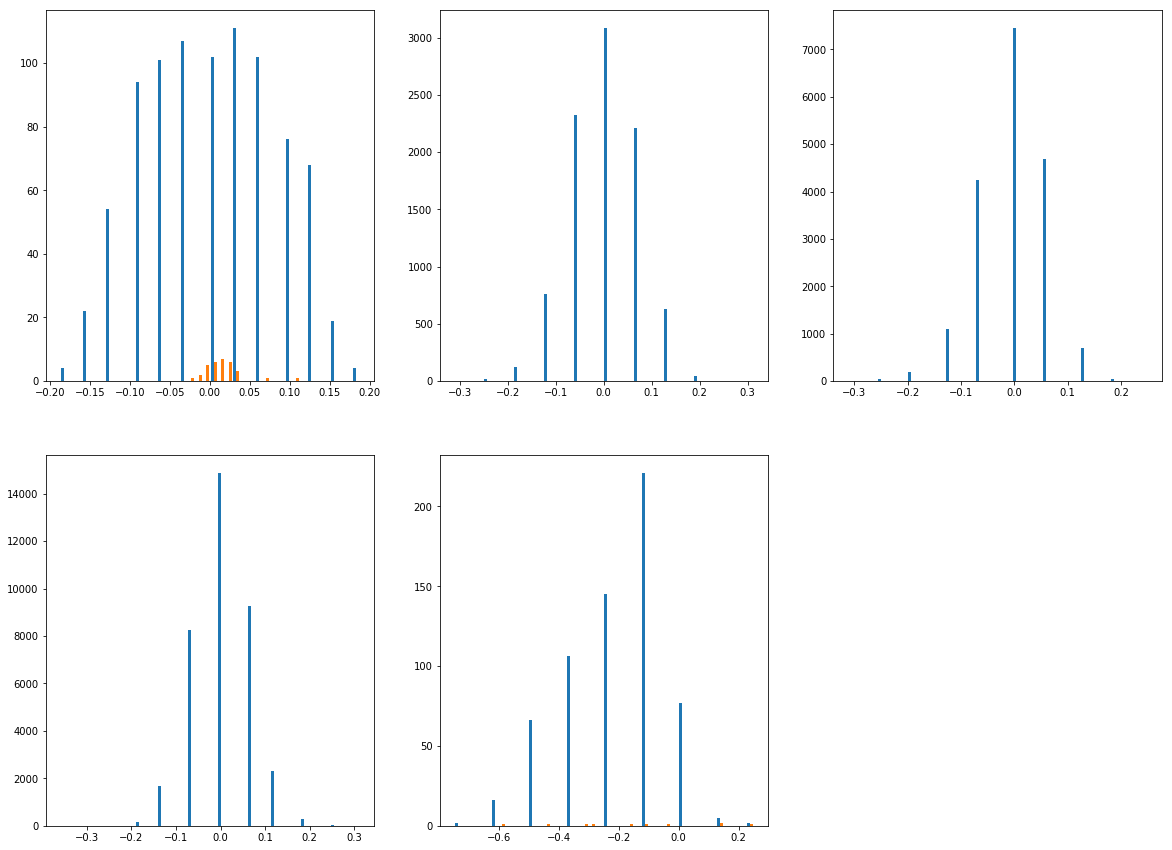

In [6]:
w_1 = keras_model.get_model_weights_by_layer(dense=True)
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax = ax.flat
for i in range(5):
    ax[i].hist(w_1[i], bins=40);
fig.delaxes(ax[-1])

In [7]:
keras_model.load_model_from_path()

In [8]:
offsets = fixed_bitwidth.find_offsets_for_model_weights(keras_model, 0, 8)
w_quant_params = {i: [8, j] for i, j in offsets.items()}
keras_model = fxp_quantize.fix_weights_quantization(keras_model, w_quant_params)

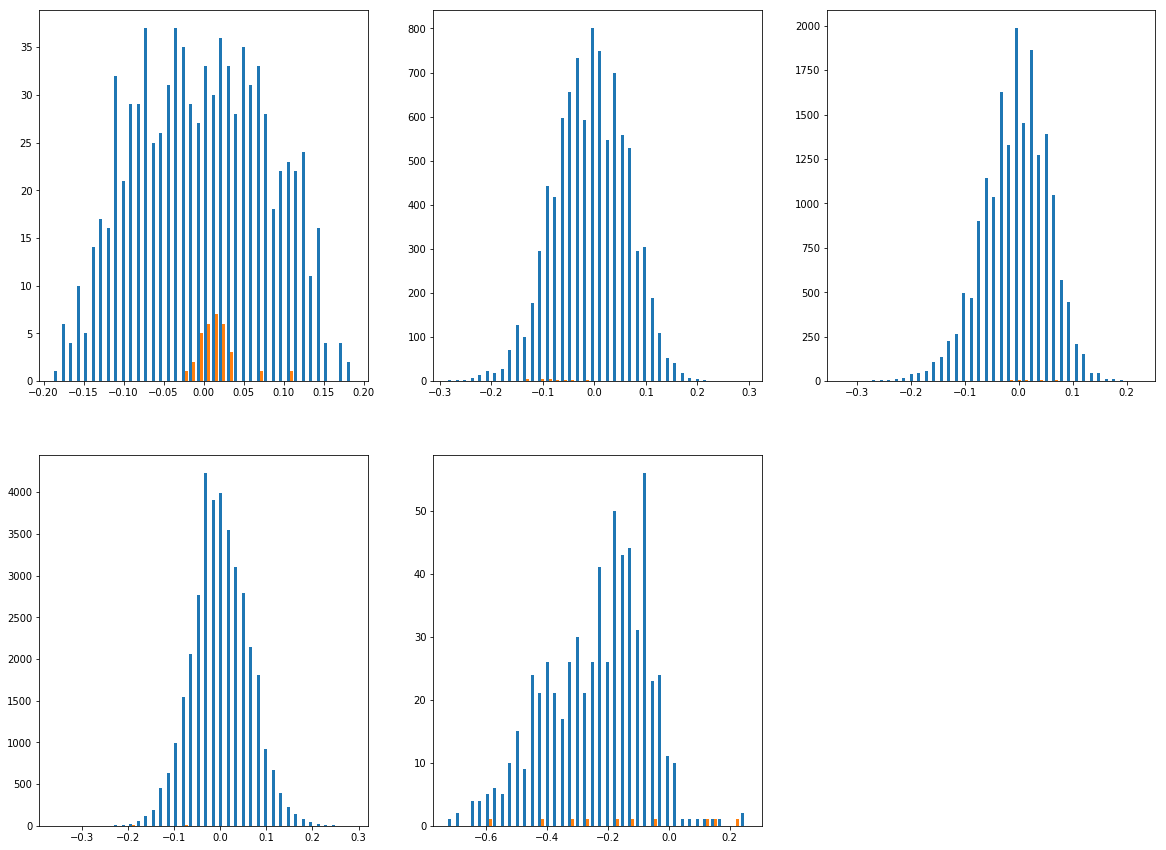

In [9]:
w_2 = keras_model.get_model_weights_by_layer(dense=True)
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax = ax.flat
for i in range(5):
    ax[i].hist(w_2[i], bins=40);
fig.delaxes(ax[-1])

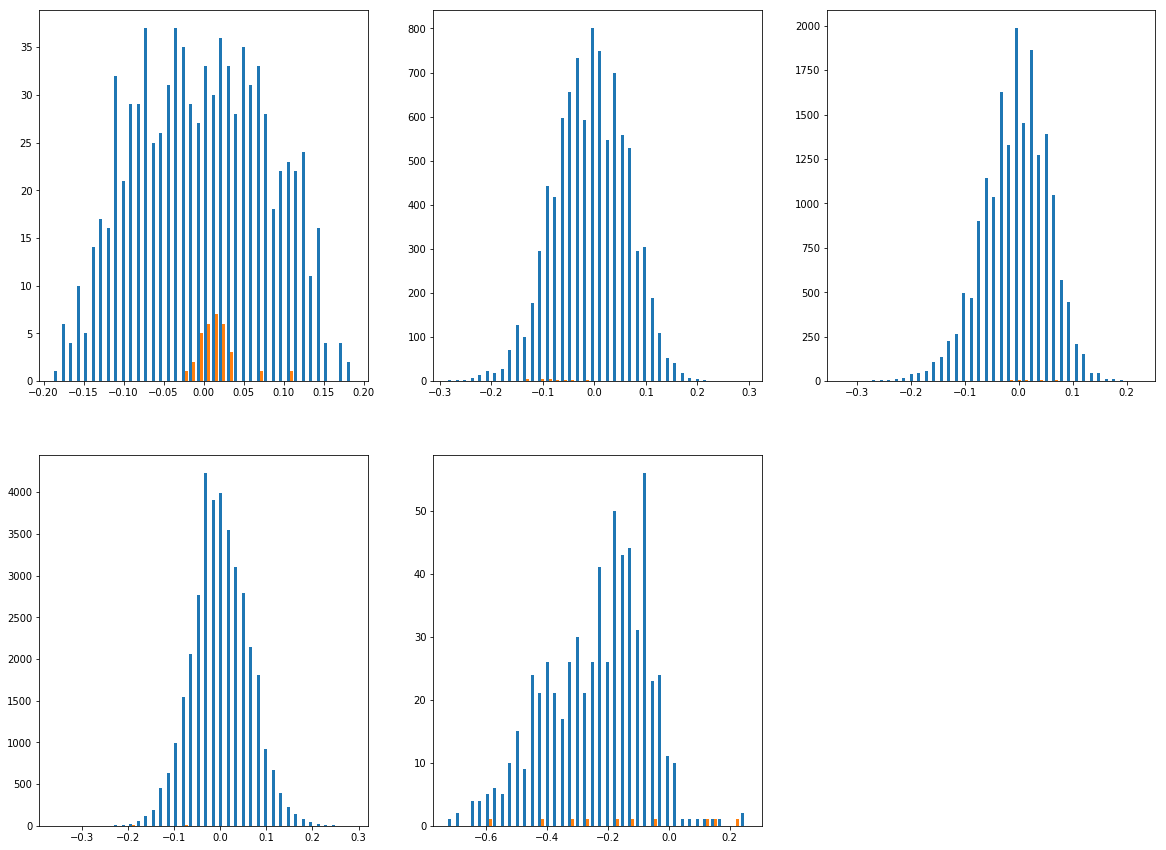

In [14]:
keras_model.load_model_from_path()
w_3 = keras_model.get_model_weights_by_layer(dense=True)
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax = ax.flat
for i in range(5):
    ax[i].hist(w_2[i], bins=40);
fig.delaxes(ax[-1])

In [15]:
# Compare max values to ensure no clipping occurs
for i in range(5):
    print(np.max(np.abs(w_1[i][0])), np.max(np.abs(w_2[i][0])), np.max(np.abs(w_3[i][0])))

0.1875 0.1875 0.1875636
0.3125 0.296875 0.29826266
0.25 0.2265625 0.22601189
0.3125 0.2890625 0.2876207
0.25 0.2578125 0.25907263


In [10]:
# Vary the bitwidth but keep it fixed across all layers
accuracy = []
for i in range(2, 12):
    _, _, acc = fixed_bitwidth.evaluate_quantized_weights(keras_model, i)
    accuracy.append(acc)

Calculating fractional offsets for weights of the network
Original network's accuracy: 0.7452
Quantized network's accuracy: 0.1038
Accuracy drop: 86.071 %
Calculating fractional offsets for the biases of the network
Quantized network's accuracy: 0.0981
Accuracy drop: 86.836 %
Calculating fractional offsets for weights of the network
Original network's accuracy: 0.7452
Quantized network's accuracy: 0.4925
Accuracy drop: 33.910 %
Calculating fractional offsets for the biases of the network
Quantized network's accuracy: 0.4917
Accuracy drop: 34.018 %
Calculating fractional offsets for weights of the network
Original network's accuracy: 0.7452
Quantized network's accuracy: 0.7172
Accuracy drop: 3.757 %
Calculating fractional offsets for the biases of the network
Quantized network's accuracy: 0.7182
Accuracy drop: 3.623 %
Calculating fractional offsets for weights of the network
Original network's accuracy: 0.7452
Quantized network's accuracy: 0.7208
Accuracy drop: 3.274 %
Calculating fract

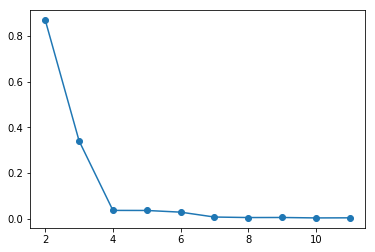

In [13]:
plt.plot(np.arange(2, 12, 1), accuracy, 'o-');

## Activations

In [6]:
input_shape = (32, 32, 3)
num_outputs = 10 # number of classes
path_trained_weights = save_path + 'cifar_keras/cifar_keras_w.h5'
name = 'cifar_keras'

from test_models.cifar_keras import data
_, test_data = data.get_data()

keras_cifar = keras_cnn.KerasCNN(input_shape, num_outputs, path_trained_weights)

In [5]:
input_shape = (96, 96, 3)
num_outputs = 10 # number of classes
path_trained_weights = 'C:/Users/320060820/experiments/test_models/cifar_df2/model_32_0.75_w.h5'
output_path = 'C:/Users/320060820/experiments/outputs/Brute_Force_Analysis/Activations/DF_CIFAR10/'
name = 'cifar_df'

from test_models.cifar_df2 import data
_, test_data = data.get_data()

df_cifar = inception_cnn.InceptionCNN(input_shape, num_outputs, path_trained_weights, dropout=True,
                                      pool_layer_type='max')

In [8]:
fixed_bitwidth.evaluate_quantized_activations(keras_cifar, name, test_data, 8, 500)

Original network's accuracy: 0.7243
Quantized network's accuracy: 0.7224
Accuracy drop: 0.262 %


{'conv2d_1': [8, 7],
 'conv2d_2': [8, 4],
 'conv2d_3': [8, 2],
 'conv2d_4': [8, 2],
 'dense_1': [8, 1]}

In [6]:
fixed_bitwidth.evaluate_quantized_activations(df_cifar, name, test_data, 8, 500)

Original network's accuracy: 0.7452
Quantized network's accuracy: 0.7415
Accuracy drop: 0.497 %


{'conv2d_1': [8, 2],
 'conv2d_5': [8, 1],
 'conv2d_3': [8, 1],
 'conv2d_6': [8, -2],
 'conv2d_2': [8, 1],
 'conv2d_4': [8, -3],
 'conv2d_7': [8, -3],
 'conv2d_8': [8, 1],
 'conv2d_12': [8, -2],
 'conv2d_10': [8, -2],
 'conv2d_13': [8, -3],
 'conv2d_9': [8, -2],
 'conv2d_11': [8, -3],
 'conv2d_14': [8, -3],
 'conv2d_15': [8, -3],
 'conv2d_19': [8, -4],
 'conv2d_17': [8, -3],
 'conv2d_20': [8, -4],
 'conv2d_16': [8, -2],
 'conv2d_18': [8, -3],
 'conv2d_21': [8, -3],
 'conv2d_22': [8, -4],
 'binary': [8, 2]}